# PyGeM
## Tutorial 4: Radial Basis Functions interpolation technique on a cube

In this tutorial we will show how to use the Radial Basis Functions interpolation technique to deform a cube.

First of all we import the pygem package, numpy and we set matplotlib for the notebook.

In [1]:
%matplotlib inline
import pygem as pg
import numpy as np
import matplotlib.pyplot as plt

We need to read a parameters file. If does not exist the RBFParameters() class creates a default prm file that you have to edit for your problem specifications.

In [2]:
params = pg.params.RBFParameters()
params.read_parameters(filename='../tests/test_datasets/parameters_rbf_cube.prm')

The following is the parameters file for this particular case. The Radial Basis Functions section describes the basis functions to use. Here we use Gaussian splines with the distance parameter equal to 0.5 (see the documentation of the RBF class for more details). As control points we consider the 8 vertices of the cube (the first one is not exactly the vertex), and we move 3 of them. In the Control points section there are all the coordinates of the control points.

[Radial Basis Functions]  
&#35; This section describes the radial basis functions shape.  
  
&#35; basis funtion is the name of the basis functions to use in the transformation. The functions  
&#35; implemented so far are: gaussian_spline, multi_quadratic_biharmonic_spline,  
&#35; inv_multi_quadratic_biharmonic_spline, thin_plate_spline, beckert_wendland_c2_basis.  
&#35; For a comprehensive list with details see the class RBF.  
basis function: gaussian_spline  

&#35; radius is the scaling parameter r that affects the shape of the basis functions. See the documentation  
&#35; of the class RBF for details.  
radius: 0.5  
  
  
[Control points]  
&#35; This section describes the RBF control points.  
  
&#35; original control points collects the coordinates of the interpolation control points before the deformation.  
original control points: &nbsp;-.1&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;1.0  
  
&#35; deformed control points collects the coordinates of the interpolation control points after the deformation.  
deformed control points: &nbsp;0.1&nbsp;&nbsp;&nbsp;0.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.3  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;&nbsp;.8&nbsp;&nbsp;&nbsp;&nbsp;1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0&nbsp;&nbsp;&nbsp;1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;1.0&nbsp;&nbsp;&nbsp;0.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2&nbsp;&nbsp;&nbsp;1.2&nbsp;&nbsp;&nbsp;1.2  


Here we create a 10-by-10-by-10 lattice to mimic a cube.

In [3]:
nx, ny, nz = (10, 10, 10)
mesh = np.zeros((nx * ny * nz, 3))

xv = np.linspace(0, 1, nx)
yv = np.linspace(0, 1, ny)
zv = np.linspace(0, 1, nz)
z, y, x = np.meshgrid(zv, yv, xv)

mesh = np.array([x.ravel(), y.ravel(), z.ravel()])
mesh = mesh.T

Now we plot the points to see what we are doing.

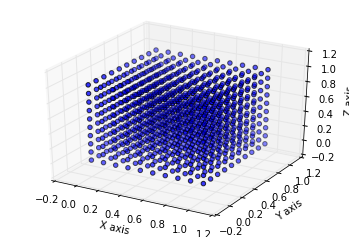

In [4]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mesh[:, 0], mesh[:, 1], mesh[:, 2], c='blue', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

With the utils module we can also plot the original control points and the deformed ones.

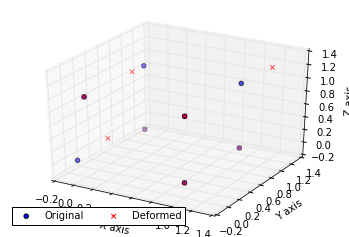

In [5]:
pg.utils.plot_rbf_control_points(params, save_fig=False)

Finally we perform the RBF interpolation using the RBF class.

In [6]:
rbf = pg.radial.RBF(params, mesh)
rbf.perform()
new_mesh_points = rbf.modified_mesh_points

We can plot the new points in order to see the deformation. Try different basis functions and radii to better fit your specific problem.

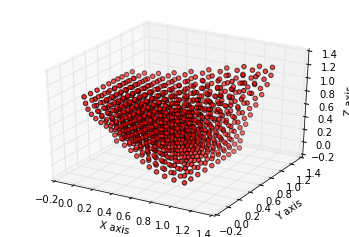

In [7]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_mesh_points[:, 0], new_mesh_points[:, 1], new_mesh_points[:, 2], c='red', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()